In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim
from tqdm.auto import tqdm

import multitask.dataset as dataset
import multitask.models.individual.hooks as hooks
from multitask.models.individual.models import get_individual_model
from multitask.representations import get_mean_activations, calculate_sm, plot_sm
from multitask.utils.training import get_device
from multitask.utils.argparse import check_runs

In [2]:
path_data = os.path.join('..', '..', 'data')
path_model_sequential = os.path.join('..', '..', 'results', 'individual')

In [3]:
path_figure = os.path.join('svg', 'figureS09_sm_individual.svg')

path_pickle_2 = os.path.join('pickle', 'sequential_2.pickle')
path_pickle_5 = os.path.join('pickle', 'sequential_5.pickle')

In [4]:
num_runs = 10
initial_seed = 6789
max_seed = 10e5
num_epochs = 50
num_hidden = 5 * [100]
batch_size = 100
num_train = 50000
num_test = 10000
tasks_names = ['parity', 'value']
num_tasks = len(tasks_names)

In [5]:
parameters = {
    'num_runs': num_runs,
    'initial_seed': initial_seed,
    'max_seed': max_seed,
    'num_epochs': num_epochs,
    'num_hidden': num_hidden,
    'batch_size': batch_size,
    'num_train': num_train,
    'num_test': num_test,
    'tasks': tasks_names,
    'idxs_contexts': None
}

data_folder = check_runs(path_model_sequential, parameters)

Found simulation in ../../results/individual with the same parameters (2022-09-27_22_43_04)


In [6]:
pickle_data = os.path.join(data_folder, 'data.pickle')
with open(pickle_data, 'rb') as handle:
    results_individual = pickle.load(handle)

In [7]:
seeds = sorted(list(results_individual.keys()))
num_seeds = len(seeds)
num_tasks = len(tasks_names)

print(seeds)
print(tasks_names)

[10612, 17350, 130146, 173249, 213794, 341996, 440064, 668870, 858781, 894813]
['parity', 'value']


In [8]:
tasks_datasets = dataset.get_tasks_dict(tasks_names, root=path_data)

In [9]:
device = get_device()
criterion = nn.CrossEntropyLoss()
num_layers = len(num_hidden)

list_sm_2 = []
mean_activations_2 = []

for i_seed, seed in tqdm(enumerate(seeds), total=num_seeds):
    task_activations = []
    task_numbers = []
    indices = results_individual[seed]['indices']

    for i_task, task_name in enumerate(tasks_names):
        state_dict = results_individual[seed][task_name]['model']

        model = get_individual_model(num_hidden,
                                     device)
        model.load_state_dict(state_dict)
        model.to(device)

        task_dataset = tasks_datasets[task_name]
        test_sampler = dataset.SequentialSampler(indices['test'])
        testloader = torch.utils.data.DataLoader(task_dataset,
                                                 sampler=test_sampler,
                                                 batch_size=batch_size)

        numbers = testloader.dataset.numbers.numpy()
        numbers = numbers[indices['test']]

        _, activations = hooks.get_layer_activations(model,
                                                     testloader,
                                                     criterion,
                                                     device=device,
                                                     disable=True)
        
        task_activations.append(activations)
        task_numbers.append(numbers)
    
    mean_activations = get_mean_activations(task_activations,
                                            num_hidden,
                                            list_labels=task_numbers,
                                            tasks_names=tasks_names)

    rdm_dict = calculate_sm(mean_activations,
                            tasks_names=tasks_names)

    list_sm_2.append(rdm_dict)
    mean_activations_2.append(mean_activations)

Running on CPU.


  0%|          | 0/10 [00:00<?, ?it/s]

In [10]:
initial_seed = 9876
tasks_names = ['parity', 'value', 'prime', 'fibonacci', 'multiples3']

parameters['initial_seed'] = initial_seed
parameters['tasks'] = tasks_names

data_folder = check_runs(path_model_sequential, parameters)

Found simulation in ../../results/individual with the same parameters (2024-01-19_14-32-06)


In [11]:
pickle_data = os.path.join(data_folder, 'data.pickle')
with open(pickle_data, 'rb') as handle:
    results_individual = pickle.load(handle)

In [12]:
seeds = sorted(list(results_individual.keys()))
num_seeds = len(seeds)
num_tasks = len(tasks_names)

print(seeds)
print(tasks_names)

[35826, 71651, 115238, 116103, 120635, 134969, 251708, 599912, 613403, 791925]
['parity', 'value', 'prime', 'fibonacci', 'multiples3']


In [13]:
tasks_datasets = dataset.get_tasks_dict(tasks_names, root=path_data)

In [14]:
device = get_device()
criterion = nn.CrossEntropyLoss()
num_layers = len(num_hidden)

list_sm_5 = []
mean_activations_5 = []

for i_seed, seed in tqdm(enumerate(seeds), total=num_seeds):
    task_activations = []
    task_numbers = []
    indices = results_individual[seed]['indices']

    for i_task, task_name in enumerate(tasks_names):
        state_dict = results_individual[seed][task_name]['model']

        model = get_individual_model(num_hidden,
                                     device)
        model.load_state_dict(state_dict)
        model.to(device)

        task_dataset = tasks_datasets[task_name]
        test_sampler = dataset.SequentialSampler(indices['test'])
        testloader = torch.utils.data.DataLoader(task_dataset,
                                                 sampler=test_sampler,
                                                 batch_size=batch_size)

        numbers = testloader.dataset.numbers.numpy()
        numbers = numbers[indices['test']]

        _, activations = hooks.get_layer_activations(model,
                                                     testloader,
                                                     criterion,
                                                     device=device,
                                                     disable=True)
        
        task_activations.append(activations)
        task_numbers.append(numbers)

    mean_activations = get_mean_activations(task_activations,
                                            num_hidden,
                                            list_labels=task_numbers,
                                            tasks_names=tasks_names)

    rdm_dict = calculate_sm(mean_activations,
                            tasks_names=tasks_names)

    list_sm_5.append(rdm_dict)
    mean_activations_5.append(mean_activations)

Running on CPU.


  0%|          | 0/10 [00:00<?, ?it/s]

In [15]:
parent_pickle = os.path.dirname(path_pickle_2)

if not os.path.exists(parent_pickle):
    os.makedirs(parent_pickle)

with open(path_pickle_2, 'wb') as f:
    pickle.dump(mean_activations_2, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(path_pickle_5, 'wb') as f:
    pickle.dump(mean_activations_5, f, protocol=pickle.HIGHEST_PROTOCOL)

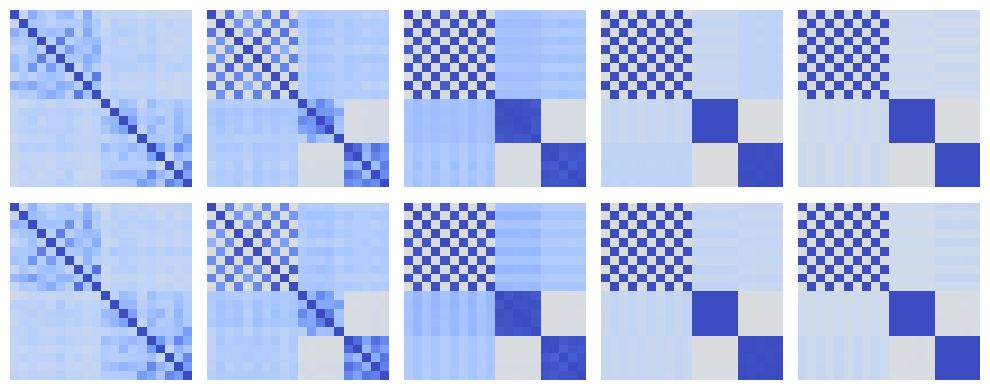

In [16]:
mean_sm_2 = {}
mean_sm_5 = {}

for layer in range(num_layers):
    mean_sm_2[layer+1] = np.zeros((20, 20))
    for rdm in list_sm_2:
        mean_sm_2[layer+1] += rdm[layer+1]
    mean_sm_2[layer+1] /= num_runs

for layer in range(num_layers):
    mean_sm_5[layer+1] = np.zeros((20, 20))
    for rdm in list_sm_5:
        mean_sm_5[layer+1] += rdm[layer+1][:20, :20]
    mean_sm_5[layer+1] /= num_runs

fig, ax = plt.subplots(2, num_layers, figsize=(2 * num_layers, 4))
plot_sm(ax[0], mean_sm_2, num_hidden)
plot_sm(ax[1], mean_sm_5, num_hidden)
fig.tight_layout()
fig.savefig(path_figure)
plt.show()